/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


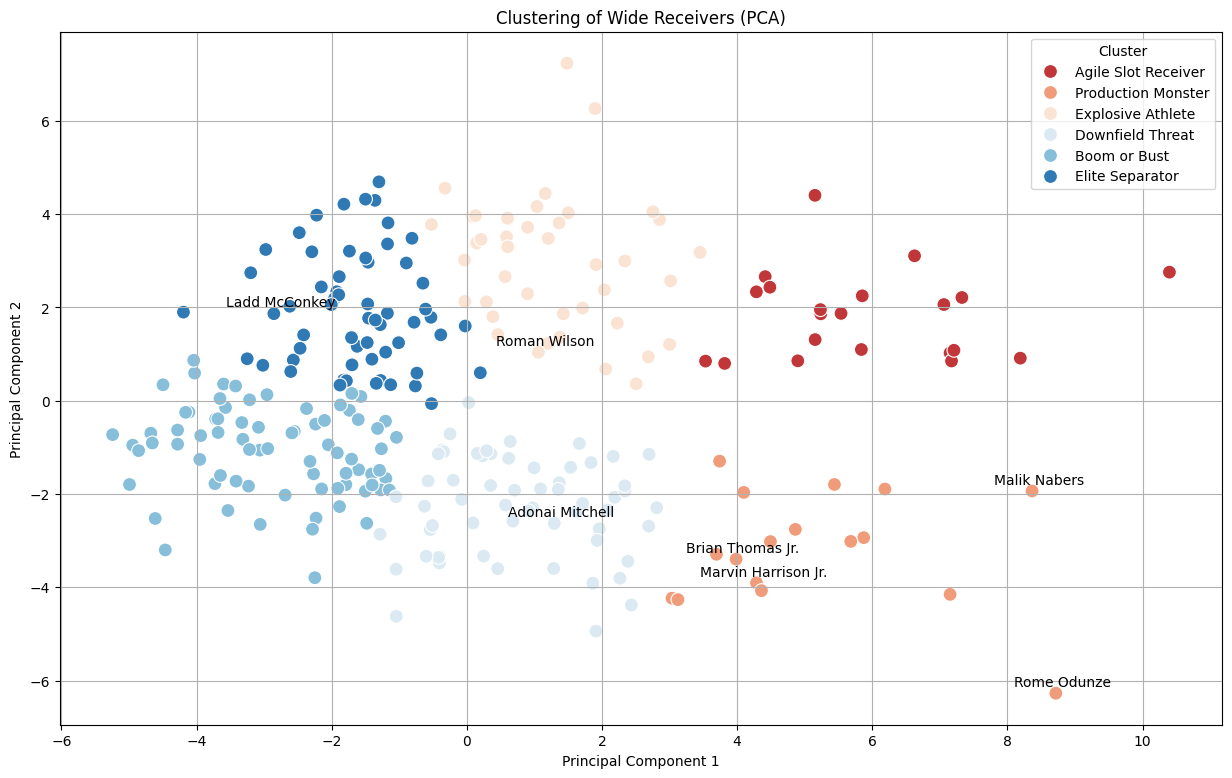


Wide Receivers in Each Cluster:
cluster
3    76
0    61
1    59
5    41
2    21
4    17
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

data = pd.read_csv("receiving_summary.csv")

#filtering out based on certain stats
data = data[data['yards'] >= 400]
data = data.drop(columns=['grades_pass_block'])
data = data[data['position'] == 'WR']
data = data.dropna()

#select the numerical features for clustering
X = data.drop(columns=['player', 'player_id', 'position', 'team_name', 'franchise_id', 'grades_offense'])

#normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

#pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

#perform k-means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_pca)

categories = []

data['cluster'] = kmeans.labels_

for index, row in data.iterrows():
  if row['cluster'] == 0:
    categories.append('Downfield Threat')
  elif row['cluster'] == 1:
    categories.append('Elite Separator')
  elif row['cluster'] == 2:
    categories.append('Agile Slot Receiver')
  elif row['cluster'] == 3:
    categories.append('Boom or Bust')
  elif row['cluster'] == 4:
    categories.append('Production Monster')
  elif row['cluster'] == 5:
    categories.append('Explosive Athlete')

data['class'] = categories

players_to_annotate = ['Malik Nabers','Ladd McConkey','Roman Wilson','Rome Odunze', 'Brian Thomas Jr.', 'Marvin Harrison Jr.', 'Adonai Mitchell']

plt.figure(figsize=(15, 9))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='class', data=data, palette='RdBu', s=100)

for i, txt in enumerate(data['player']):
    if txt in players_to_annotate:
      plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Clustering of Wide Receivers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\nWide Receivers in Each Cluster:")
print(data['cluster'].value_counts())


<Axes: xlabel='cluster', ylabel='caught_percent'>

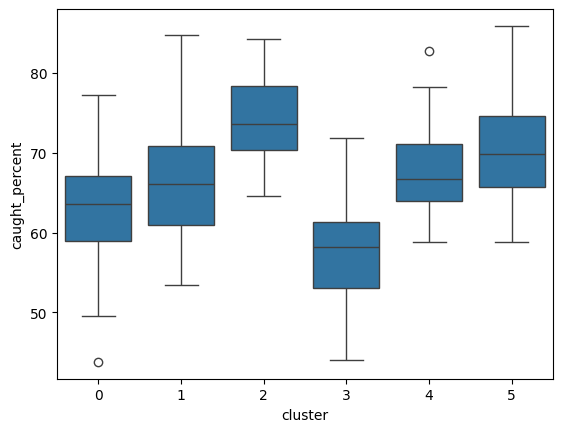

In [ ]:
sns.boxplot(x = data['cluster'], y = data['caught_percent'])

In [ ]:
data.to_csv('receivers.csv')

In [ ]:
#group the players by cluster
cluster_groups = data.groupby('cluster')

cluster_players = pd.DataFrame(columns=['Cluster', 'Player', 'Position', 'Team'])

for cluster_label, cluster_data in cluster_groups:
    players_in_cluster = cluster_data[['player', 'position', 'team_name']]
    players_in_cluster.insert(0, 'Cluster', cluster_label)
    cluster_players = pd.concat([cluster_players, players_in_cluster])

cluster_players = cluster_players.sort_values(by='Cluster')
print(cluster_players)


    Cluster Player Position Team              player position   team_name
27        0    NaN      NaN  NaN  Derwin Burgess Jr.       WR  GA SOUTHRN
88        0    NaN      NaN  NaN         Javon Baker       WR         UCF
91        0    NaN      NaN  NaN    Jamaal Pritchett       WR   S ALABAMA
93        0    NaN      NaN  NaN           Bub Means       WR  PITTSBURGH
94        0    NaN      NaN  NaN          CJ Daniels       WR     LIBERTY
..      ...    ...      ...  ...                 ...      ...         ...
96        5    NaN      NaN  NaN      Elijah Metcalf       WR   MIDDLE TN
97        5    NaN      NaN  NaN         Jared Brown       WR   COAST CAR
106       5    NaN      NaN  NaN      Jacob De Jesus       WR        UNLV
63        5    NaN      NaN  NaN         Jaylin Noel       WR  IOWA STATE
311       5    NaN      NaN  NaN       Easton Messer       WR  W KENTUCKY

[275 rows x 7 columns]


In [ ]:
df = pd.DataFrame(cluster_players)
df = df.drop(columns=['Player', 'Position', 'Team', 'position'])
classes = []

for index, row in df.iterrows():
  if row['Cluster'] == 0:
    classes.append('Downfield Threat')
  elif row['Cluster'] == 1:
    classes.append('Elite Separator')
  elif row['Cluster'] == 2:
    classes.append('Agile Slot Receiver')
  elif row['Cluster'] == 3:
    classes.append('Boom or Bust')
  elif row['Cluster'] == 4:
    classes.append('Production Monster')
  elif row['Cluster'] == 5:
    classes.append('Explosive Athlete')

df['Class'] = classes
df


,Cluster,player,team_name,Class
27,0,Derwin Burgess Jr.,GA SOUTHRN,Downfield Threat
88,0,Javon Baker,UCF,Downfield Threat
91,0,Jamaal Pritchett,S ALABAMA,Downfield Threat
93,0,Bub Means,PITTSBURGH,Downfield Threat
94,0,CJ Daniels,LIBERTY,Downfield Threat
...,...,...,...,...
96,5,Elijah Metcalf,MIDDLE TN,Explosive Athlete
97,5,Jared Brown,COAST CAR,Explosive Athlete
106,5,Jacob De Jesus,UNLV,Explosive Athlete
63,5,Jaylin Noel,IOWA STATE,Explosive Athlete


In [ ]:
specified_players = ['Jalen McMillan', 'Ricky Pearsall', "Ja'Lynn Polk", 'Xavier Legette', 'Malachi Corley', 'Ainias Smith', 'Malik Washington', 'Roman Wilson', 'Jermaine Burton', 'Devontez Walker']

selected_df = pd.DataFrame(columns=df.columns)
selected_rows = []

for player in specified_players:
    player_rows = df[df['player'] == player]
    selected_rows.append(player_rows)
    selected_df = pd.concat(selected_rows)

selected_df = selected_df.drop(columns=['Cluster'])
print("Selected Dataframe:")
print(selected_df)


Selected Dataframe:
               player   team_name                Class
199    Jalen McMillan  WASHINGTON      Elite Separator
79     Ricky Pearsall     FLORIDA    Explosive Athlete
28       Ja'Lynn Polk  WASHINGTON   Production Monster
53     Xavier Legette  S CAROLINA   Production Monster
21     Malachi Corley  W KENTUCKY  Agile Slot Receiver
114      Ainias Smith   TEXAS A&M    Explosive Athlete
3    Malik Washington    VIRGINIA  Agile Slot Receiver
170      Roman Wilson    MICHIGAN    Explosive Athlete
253   Jermaine Burton     ALABAMA     Downfield Threat
182   Devontez Walker  N CAROLINA         Boom or Bust


In [ ]:
selected_df.to_csv('final_data.csv')

In [ ]:
df2 = pd.read_csv('receiving_summary.csv')
df2 = df2.dropna()
df2.head()

,player,player_id,position,team_name,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,...,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
9,Isaiah Williams,97156,WR,ILLINOIS,12,8.5,24,64.6,21.4,3,...,93.8,127,5,16.7,76,1055,553,6.7,12.9,2.51
11,Jacob Cowing,100894,WR,ARIZONA,13,6.7,8,73.6,35.7,5,...,115.3,121,13,29.2,138,868,516,5.8,9.8,1.92
18,Xavier Restrepo,122220,WR,MIAMI FL,13,9.3,14,71.4,46.7,7,...,103.0,119,6,5.0,21,1102,355,4.2,13.0,2.76
27,Derwin Burgess Jr.,147111,WR,GA SOUTHRN,13,9.4,15,67.9,54.5,12,...,96.4,109,6,84.6,501,808,306,4.1,10.9,1.43
28,Ja'Lynn Polk,123153,WR,WASHINGTON,15,13.8,15,63.9,54.2,13,...,120.1,108,9,58.7,317,1159,356,5.2,16.8,2.29


In [ ]:
x = df.drop(columns=['player', 'player_id', 'position', 'team_name', 'player_game_count'])

In [ ]:
x2 = df2.drop(columns=['player', 'player_id', 'position', 'team_name', 'player_game_count'])

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x2)

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

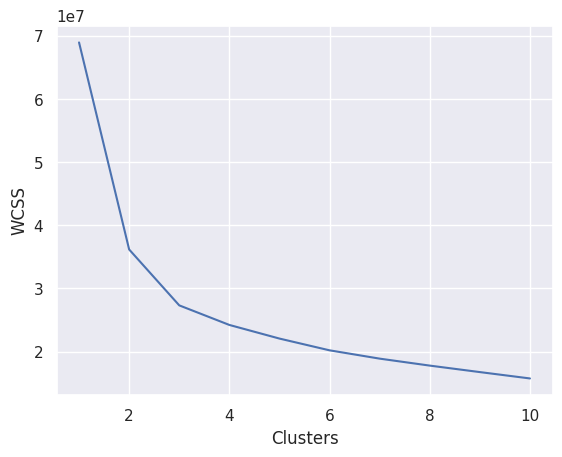

In [ ]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()